---

# **AIPI 590 - XAI | Assignment #08**
## **The Quest of Doggo Data and Cat Insight: Visualizing Wisdom in the Embedding Forest**

**Name** : Akhil Chintalapati

**Citations**:
Manan. 2021. Quotes 500K. Kaggle. Accessed October 31, 2024. https://www.kaggle.com/datasets/manann/quotes-500k/data.

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

---

In [ ]:
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = 'https://github.com/AIPI-590-XAI/Duke-AI-XAI.git' #Change to your path
!git clone "{git_path}"

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

## **Setting the Scene: Introduction to the Embedding Forest Adventure**


In [3]:
# Once upon a time in a vast data forest, there lived two curious explorers: Doggo named Data and a Cat (Not Cato) named Insight.
# Data, ever the organizer, loved gathering and arranging information, while Insight, with a keen eye for detail,
# delighted in discovering hidden patterns in the forest. Together, they embarked on a journey to map out the "Embedding Space",
# a mysterious realm where language turned into numbers.

# Data and Insight pack their backpacks with essentials - maps (numpy and pandas),
# drawing tools (matplotlib and seaborn), and three magical compasses (PCA, t-SNE, UMAP)
# to guide them through the winding paths of high-dimensional space.

!pip install --quiet umap-learn mteb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sentence_transformers import SentenceTransformer
import mteb
import warnings
warnings.filterwarnings("ignore")

# With their supplies ready, Data and Insight prepare to explore the Embedding Space.
# They soon encounter the Sage of Embeddings, known as Sentence-BERT, who will reveal the secrets of language in numbers.

---

## **Meeting the Sage of Embeddings: Loading the MTEB Model**

In [4]:
# The Sage of Embeddings offers Data and Insight a special model from the MTEB leaderboard - 'all-MiniLM-L6-v2'.
# Known for its linguistic wisdom, this model is famed on the leaderboard for its insights into various tasks.
# To prepare for their journey, Data and Insight will test the model's skills on a real task: Banking77 Classification.

# Load the Sage's model from the MTEB leaderboard
model_name = "sentence-transformers/all-MiniLM-L6-v2"  # Chosen from the MTEB leaderboard
model = SentenceTransformer(model_name)

# Define the task - Banking77 Classification task from MTEB to evaluate the model’s embedding skill
tasks = mteb.get_tasks(tasks=["Banking77Classification"])
evaluation = mteb.MTEB(tasks=tasks)

# Run the benchmark and record results to gauge the model's strength in classification
results = evaluation.run(model, output_folder=f"results/{model_name}")

# Display benchmark results for reference on the journey ahead
print("Benchmark Results on MTEB Banking77 Classification Task:", results)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

───────────────────────────────────────────────── Selected tasks  ─────────────────────────────────────────────────

Classification

- Banking77Classification, s2s

train.jsonl:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/365k [00:00<?, ?B/s]

Benchmark Results on MTEB Banking77 Classification Task: [TaskResult(task_name=Banking77Classification, scores=...)]


---

## **Gathering the Data: Entering the Library of 500,000 Quotes**


In [5]:
# As Data and Insight venture deeper into the mystical forest, they stumble upon an ancient structure - the Library of 500,000 Quotes.
# Legends say this place holds wisdom from thinkers, poets, and philosophers of centuries past.
# Quotes on love, life, philosophy, and the nature of existence shimmer on the shelves, waiting to guide them on their journey.

# Path to the enchanted library of quotes
file_path = "/content/quotes.csv"

# Data and Insight open the library doors and choose carefully, knowing they can’t carry it all.
# They decide to select only quotes, authors, and themes - the essence of the knowledge stored here.

# Unrolling the scrolls and gathering insights
data_df = pd.read_csv(file_path, usecols=['quote', 'author', 'category'])

# With the library opened, Data and Insight marvel at its vastness and note its treasures:
total_quotes = len(data_df)
unique_authors = data_df['author'].nunique()
unique_categories = data_df['category'].nunique()

# The library reveals its depth:
print(f"Total quotes in the library: {total_quotes}")
print(f"Unique authors represented: {unique_authors}")
print(f"Diverse themes explored: {unique_categories}")

# Sampling a manageable set of 1000 quotes, allowing Data and Insight to carry just enough for exploration
data_sample = data_df['quote'].sample(1000, random_state=42).tolist()

# Peeking at the treasures within, Data and Insight read a few quotes to glimpse the wisdom awaiting them
print("A few quotes from their journey into the depths of knowledge:")
for i, quote in enumerate(data_sample[:5], 1):
    print(f"Quote {i}: {quote}")

Total quotes in the library: 246883
Unique authors represented: 69191
Diverse themes explored: 185991
A few quotes from their journey into the depths of knowledge:
Quote 1: Materialist deny God because they can't smell a rose with a powerful telescope.
Quote 2: Never put yourself in a position to be made an example of.
Quote 3: Great obstacles are no match for a great God.
Quote 4: As long as you think that the cause of your problem is “out there”—as long as you think that anyone or anything is responsible for your suffering—the situation is hopeless. It means that you are forever in the role of victim, that you’re suffering in paradise.
Quote 5: Meditation is a way for nourishing and blossoming the divinity within you.


---

## **Converting Quotes to Embeddings: The Sage’s Transformation**

In [6]:
# With a wealth of quotes in hand, Data and Insight seek guidance on understanding each thought as a unique pattern.
# The Sage of Embeddings, powerful and wise, transforms each quote into a numeric "embedding", a hidden dimension map,
# making each quote a path through the space of meaning.

embeddings = model.encode(data_sample)  # Encoding the sample quotes into embedding vectors

# Organizing the embeddings in a DataFrame for easy handling
embedding_df = pd.DataFrame(embeddings)
print("Embeddings shape:", embedding_df.shape)

Embeddings shape: (1000, 384)


---

## **Exploring the Landscape: PCA - A Broad Overview**

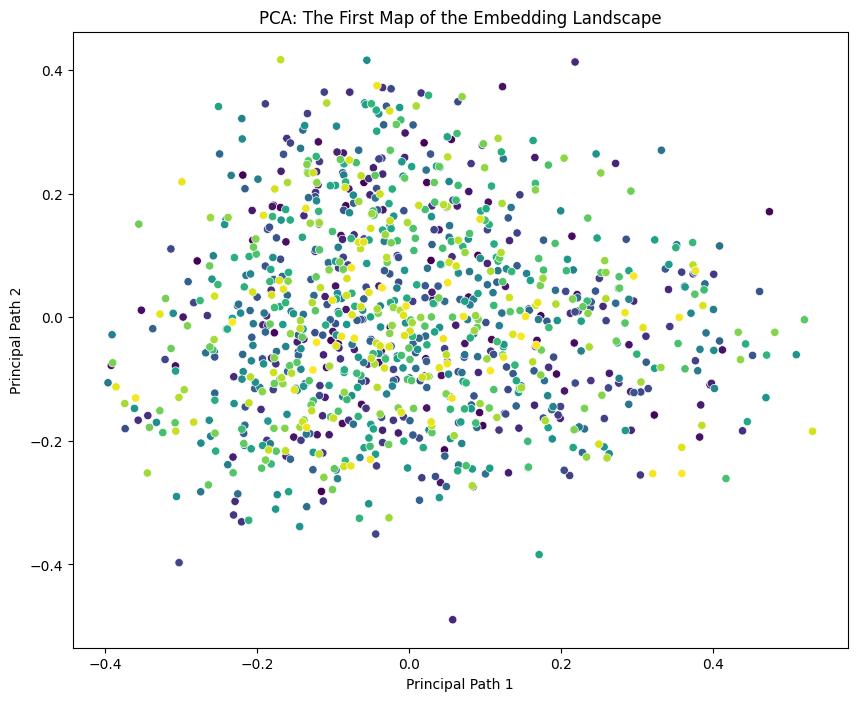

In [7]:
# With each quote now transformed into an embedding, Data and Insight prepare to take their first look across the
# landscape of meaning. To start, they choose a basic compass called PCA, which will give them a quick, simplified map
# of this vast terrain. PCA may not capture every twist and turn, but it will give them a clear first look at the main paths.

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)  # Reducing to two principal components

# Charting their new map, they observe the major paths emerging from PCA’s perspective
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=[f"Quote {i}" for i in range(len(data_sample))],
                palette="viridis", legend=None)
plt.title("PCA: The First Map of the Embedding Landscape")
plt.xlabel("Principal Path 1")
plt.ylabel("Principal Path 2")
plt.show()

---

## **Exploring the Landscape: t-SNE - Discovering Clusters**

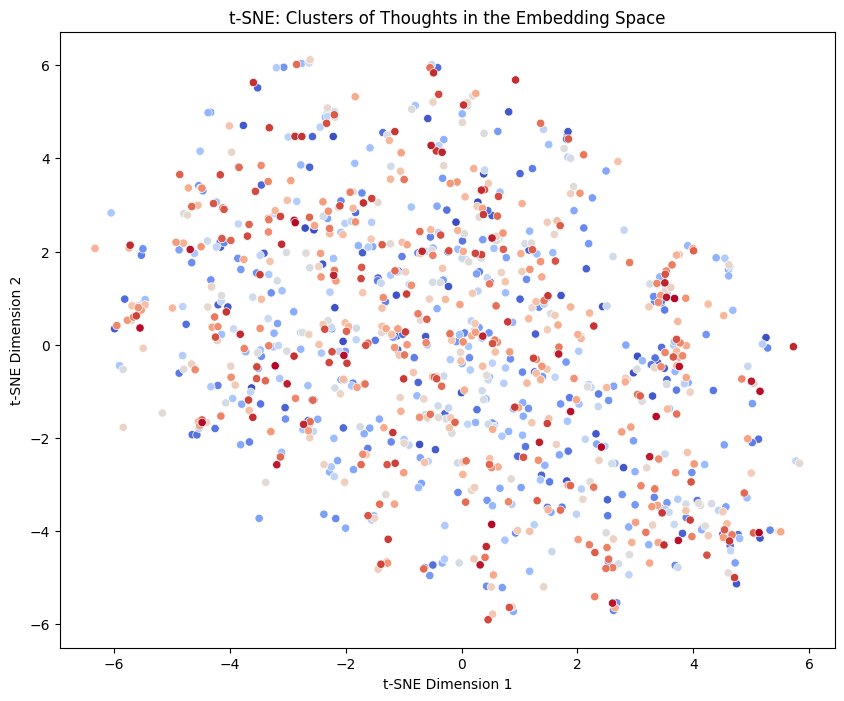

In [8]:
# Having glimpsed the broad landscape with PCA, Data and Insight now seek a more intricate map.
# They turn to t-SNE, a guide known for unveiling hidden paths and gathering clusters of thoughts.
# Though t-SNE is known to be a bit temperamental, Data and Insight believe it can reveal meaningful clusters
# among the quotes, showing them groups of similar thoughts woven together in the fabric of the embedding space.

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Charting the clusters in t-SNE’s detailed map
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=[f"Quote {i}" for i in range(len(data_sample))],
                palette="coolwarm", legend=None)
plt.title("t-SNE: Clusters of Thoughts in the Embedding Space")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

---

## **Exploring the Landscape: UMAP - A Balanced Map**

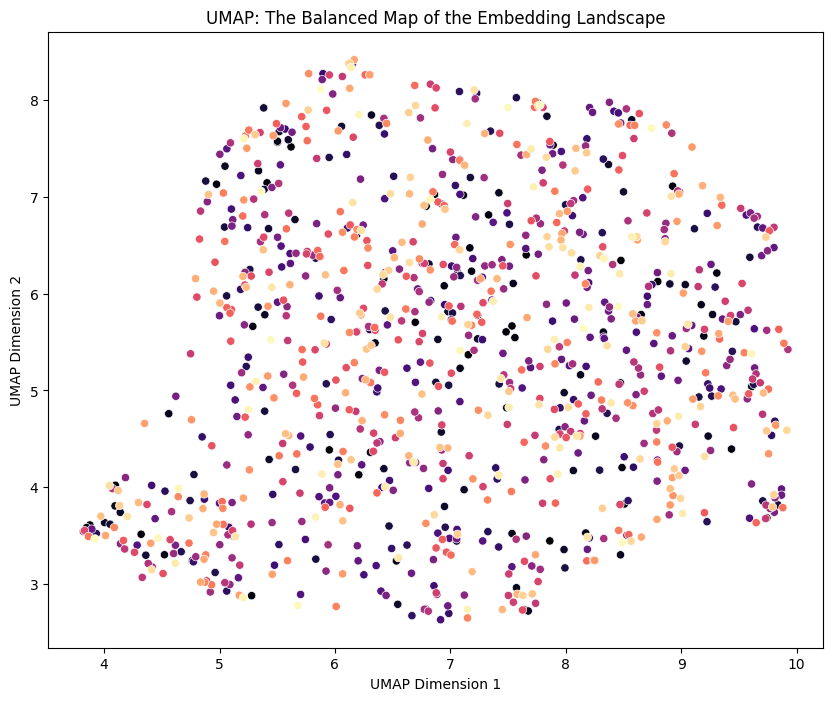

In [9]:
# After glimpsing the main paths with PCA and uncovering hidden clusters with t-SNE, Data and Insight meet UMAP,
# a guide with a reputation for balance. UMAP promises a map that blends global connections with local clusters,
# giving a fuller view of the embedding landscape. Fast and versatile, UMAP reveals the patterns while preserving
# meaningful groupings of quotes.

umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_result = umap_reducer.fit_transform(embeddings)

# Plotting the balanced view of the embedding space with UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=[f"Quote {i}" for i in range(len(data_sample))],
                palette="magma", legend=None)
plt.title("UMAP: The Balanced Map of the Embedding Landscape")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

---

# **Embedding Visualization Summary: The Legendary Journey of Data and Insight**

As Data the Doggo and Insight the Cat ventured deeper into the **forest of high-dimensional embeddings**, they sought to understand the mysterious patterns hidden within thousands of quotes. Along their journey, they created three maps - **PCA**, **t-SNE**, and **UMAP** - each offering a unique perspective on the embedding space. Each map had its strengths, limitations, and peculiarities, leading our heroes to unravel the forest's secrets from multiple angles. Here's a detailed account of their adventure, with insights into each visualization and how it shaped their understanding of the embedding landscape.

### **Note from Data and Insight:**
As they rummaged through the vast library of quotes, Data the Cute Doggo and Insight the Silly Cat quickly realized that to keep their exploration light and nimble, they decided to sample only **1,000 quotes** from the library.

While this made their journey faster and kept their paws from getting tired, it also meant that **clear clusters** might not be as prominent in their maps. If you, dear reader, wish to unveil the perfect clusters and dive deeper into the intricate paths of meaning, you might want to spend a bit more time - perhaps by increasing the number of samples or adjusting some of those pesky hyperparameters!

After all, every great adventure deserves the chance to uncover all its secrets. So, don't hesitate to play around - your journey through the embedding space awaits!

---

### **The Broad Overview: PCA – The First Glimpse of the Forest**

Their journey began with **PCA (Principal Component Analysis)**, an old and reliable tool known for capturing the dominant patterns in high-dimensional spaces. PCA provided them with a quick, high-level view of the embedding space, reducing each quote to just two main directions, or "principal components." This initial map was circular and evenly spread, with points scattered across the plane like stars.

- **Observations**:
  - **PCA revealed a continuous spread of points** with no clear boundaries or clusters. The quotes seemed to flow seamlessly from one area to another, giving an overall shape but not much granularity.
  - The map was **centered around the origin**, reflecting the main directions in which quotes varied. However, each direction in PCA represents only linear combinations of dimensions, which often miss the complexities of non-linear relationships.
  
- **Insights**:
  - **PCA excels at capturing the global structure** of the embedding space by prioritizing variance, which means it can show how quotes differ in broad themes. For instance, quotes that deviate significantly from the mean in sentiment or topic may be represented along distinct principal components.
  - However, **PCA is limited in capturing local patterns** or clusters. By focusing solely on maximizing variance, PCA overlooks finer relationships, making it challenging to interpret clusters of closely related quotes.
  
- **Conclusion**: PCA gave Data and Insight a **broad overview**, a general map that outlined the landscape but didn't capture the intricate paths within it. Data, happy with the speed and simplicity of PCA, wagged his tail; but Insight felt unsatisfied, sensing there was more to uncover.

> *PCA provided a wide-angle view of the forest, but its simplistic approach meant many trees and paths remained hidden from view.*

---

### **Discovering Local Clusters: t-SNE – A Closer Look at Friendships**

Eager to dig deeper, Data and Insight turned to **t-SNE (t-Distributed Stochastic Neighbor Embedding)**, a powerful but temperamental tool known for preserving **local structure**. Unlike PCA, which emphasized the main directions, t-SNE zoomed into clusters, revealing smaller groups of quotes that shared similar meanings. The map was scattered, with pockets of tightly-knit points.

- **Observations**:
  - t-SNE generated **clusters of closely related quotes**, each grouping representing a set of ideas or themes. For example, quotes on positivity and motivation might cluster in one corner, while philosophical reflections gathered in another.
  - However, **t-SNE often spread clusters apart**, creating an isolated, jumbled map. The distances between clusters weren't always meaningful, making it difficult to interpret the relationships between distant groups.

- **Insights**:
  - t-SNE is effective for **finding local clusters**, highlighting groups of quotes that are similar in context or sentiment. This method works well when the goal is to discover sub-groups within a dataset, making it ideal for identifying categories or themes that naturally emerge in the embedding space.
  - However, **t-SNE struggles with global coherence**. By focusing on preserving local neighborhoods, it often sacrifices the overall structure, meaning that the relative distances between clusters may lack interpretability. Additionally, **t-SNE is sensitive to parameters like perplexity and iterations**, which can alter the appearance of clusters.
  
- **Conclusion**: t-SNE revealed intimate clusters, showing Data and Insight groups of quotes that felt connected in meaning. Insight purred with delight at the depth and detail in each cluster. However, Data was puzzled by the disconnected layout, unsure how the clusters related to one another on a larger scale.

> *t-SNE allowed them to see hidden friendships in the forest, but it was like viewing isolated gatherings with no clear pathways connecting them.*

---

### **The Balanced Perspective: UMAP – The Perfect Blend of Local and Global**

For their final attempt, Data and Insight turned to **UMAP (Uniform Manifold Approximation and Projection)**, a more advanced and balanced guide. UMAP promised to combine the strengths of both PCA and t-SNE, preserving local clusters while maintaining a coherent global structure. Data and Insight held their breath as UMAP crafted a map that was both interconnected and nuanced.

- **Observations**:
  - UMAP's map showed **clusters of quotes similar to those in t-SNE**, but with a smoother flow between them. Unlike t-SNE, where clusters appeared isolated, UMAP provided a cohesive layout, revealing how clusters connected to form a broader network.
  - Each cluster was distinct, yet the overall map felt continuous, with a logical progression of ideas across the landscape. Quotes about positivity blended smoothly into themes of philosophy, motivation, and life reflections.

- **Insights**:
  - **UMAP excels in preserving both local and global structures**. By balancing the importance of neighborhood preservation and overall structure, UMAP captures a realistic view of the embedding space where local clusters are clear, but the relative distances between clusters are also meaningful.
  - This makes UMAP ideal for **interpretable clustering**. Not only can Data and Insight see distinct clusters, but they can also understand how these clusters relate to each other, creating a connected landscape of ideas. Additionally, **UMAP is more computationally efficient than t-SNE**, offering speed without sacrificing stability.

- **Conclusion**: UMAP provided the clearest, most balanced map of all. Data and Insight could see the distinct clusters of ideas and follow the subtle connections between them, revealing both details and the big picture. Data barked proudly, feeling that UMAP had captured the landscape perfectly. Even Insight had to admit this was the best map yet.

> *With UMAP, they could see both the gatherings and the pathways that linked them, creating a complete and harmonious view of the forest.*

---

### **Comparative Table**

| **Method**  | **Strengths** | **Weaknesses** | **Ideal For** |
|-------------|---------------|----------------|----------------|
| **PCA**     | Fast, captures main variance directions, and shows overall layout | Lacks detailed clusters and oversimplifies relationships | High-level overview of data structure |
| **t-SNE**   | Excellent at finding local clusters, reveals hidden groupings | Poor at preserving global structure; sensitive to parameters | Discovering dense, similar sub-groups of data points |
| **UMAP**    | Balances local and global structures, stable, and interpretable | Requires parameter tuning, slightly more complex than PCA | Clusters with connected global context; ideal for nuanced insights |

---

### **Final Reflection: Data Emerges Victorious**

As they reflected on their journey, Data couldn't help but feel a sense of triumph. They had explored the embedding space through three maps, each with its own unique lens, but in the end, **Data's chosen tool - UMAP - proved to be the most insightful**. It revealed both the individual clusters and the larger landscape, satisfying both Data's need for clarity and Insight's desire for depth.

Data trotted proudly through the forest, barking, “It's not about zooming in or out - it's about balance!” Insight, who prided herself on a sharper eye for detail, conceded with a purr of approval. UMAP had indeed provided a balanced view, harmonizing local clusters with global relationships, and giving them the full story.

As the sun set on the embedding forest, Data and Insight walked off, satisfied with their maps and ready for the next adventure. The moral of the story? **Balance wins the day!** And sometimes, just sometimes (actually most times), the Doggo knows best.

> *With a wag of his tail and a playful bark, Data declared himself the true hero of the embedding space. Insight, ever graceful, smiled, knowing they'd both grown wiser on this journey.*

---